# <b>Context</b>
A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.
The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases. Thats why it might be beneficial to use Machine Learning to solve this task.


<b>Problem Statement
A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. One of the improtant tasks is to build interpretable enough model to provide a justification for any adverse behavior (rejections).

<b>Data Description: 
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income.

# <b>Importing libraries and reading the dataset

In [1]:
# conda install conda=23.5.0

In [2]:
# conda install -c conda-forge miceforest

In [3]:
# conda install -c conda-forge py-xgboost-cpu

In [4]:
# pip install "ray[tune]" tune-sklearn

In [5]:
# conda install -c conda-forge ipywidgets

In [6]:
# pip install pycaret

In [7]:
# pip install optuna

In [8]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%config InlineBackend.figure_formats=['svg']
import miceforest as mf
from sklearn.model_selection import train_test_split

# Algorithms to try
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm
import scipy.stats as stats

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from pycaret.classification import *

# Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## **Reading and checking the dataset**

In [9]:
data=pd.read_csv("hmeq.csv")

In [10]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [11]:
data.shape

(5960, 13)

**Insights**:

We see that the data set consists of 5960 customer entries and 13 features each corresponding to different information about the entries.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights:**

- The most of the values are numerical
- Only the Reason and the Job are categorical
- There are some missing in the features. The DEBTINC has the most missing values (~21%).

In [13]:
data.isnull().sum()/len(data)

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

## **Converting the data types**

In [14]:
cols = data.select_dtypes(['object']).columns.tolist()
cols.append('BAD')

In [15]:
np.triu(np.ones(data.corr().shape),k=1)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
data.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


In [17]:
correlations = data.corr().where(np.triu(np.ones(data.corr().shape),k=1).astype('bool')).unstack()

In [18]:
cols

['REASON', 'JOB', 'BAD']

In [19]:
for i in cols:
    data[i] = data[i].astype('object')

# <b>Exploratory Data Analysis (EDA) and Visualization

In [113]:
data['BAD'].value_counts(normalize=True)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

In [114]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,2.0,0.0,4771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


<b> Observations and insights:  
- The average loan amount is ~19K USD, the range is from 1K to 900K USD
- The average amount due on existing mortgage is ~ 74K USD. The range is from 2K to 400K.    
- The average value of the property is ~102K USD, ranging from 8K to 856K USD. 
- The top reason for loan application is Debt Consolidation.
- The are 6 unique entries for JOB by the applicants with Other being the most popular. Which means that many applicants don't want to disclose their occupation.  
- The average amount of years at the current job is 9, ranging from 0 to 41. Most of the applicants work at the current jobs for a long time. 
- At least 75% of the customers have no derogatory reports on them. 
- At least 75% of the customers have no delinquent lines assosiated with them. 
- The oldest credit line on average is 180 months, ranging from 0 to 1168 months.
- At least half of the clients have no inquiries in their history. The max value is 17. 
- The average number of credit lines by customer is 21, ranging from 0 up to 71!. 
- The average debt payments/income ratio is 34%, ranging from 0.52% to 203%!  

## **Univariate Analysis**

### **1. Univariate Analysis - Numerical Data**

In [41]:
def histogram_boxplot(data,feature, figsize=(10,4), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(data=data,x=feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(data[feature], kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data[feature], kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(data[feature]), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(data[feature]), color='black', linestyle='-')

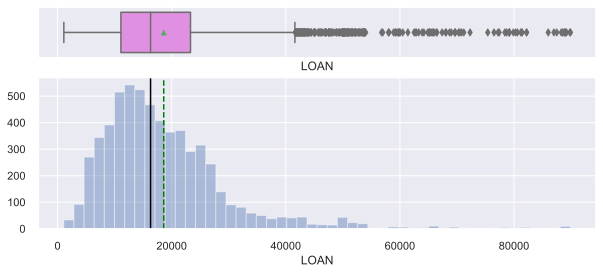

In [116]:
# Loan
histogram_boxplot(data,'LOAN')

**Insights:**

- The loan distribution is right skewed. 
- The average value is ~19K USD, the median is ~ 16K USD. 

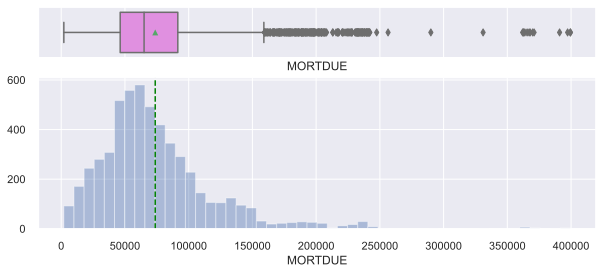

In [117]:
# Mortgage Due 
histogram_boxplot(data,'MORTDUE')

**Insights:**

- The Due Mortgage distribution is close to normal. 
- The average value is ~74K USD, the median is ~ 65K USD. 

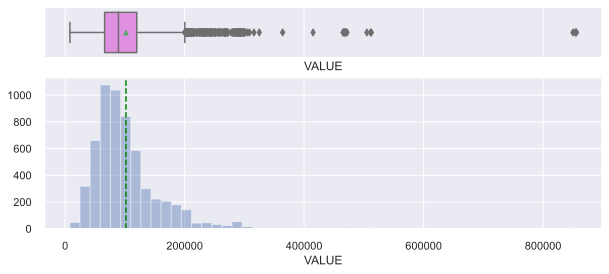

In [118]:
# Current Property Value 
histogram_boxplot(data,'VALUE')

**Insights:**

- The Current Property Value distribution is close to normal with a slight right skew. 
- The average value is ~102K USD, the median is ~ 89K USD.
- There are some values on the higher end, but they look plausible, so we will not treat them as outliers.

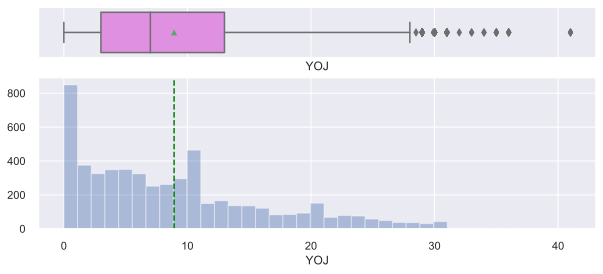

In [119]:
# Years on the current job 
histogram_boxplot(data,'YOJ')

**Insights:**

- The years on current job distribution is close is right skewed. 
- The average value is ~ 9 years, the median is ~ 7 years. 
- There are some values in the higher end of the data, but they look plausible, so we will not treat them as outliers. 

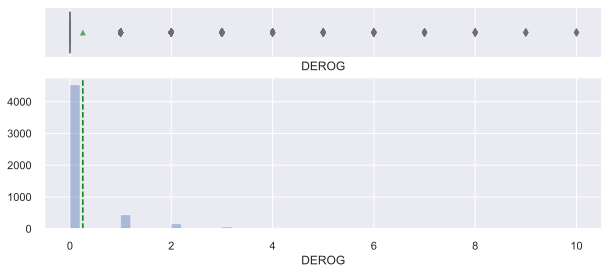

In [120]:
# The number of derogatory reports
histogram_boxplot(data,'DEROG')

**Insights:**

- The distribution of the  number of derogatory reports is discrete with the most of the customers having no reports at all. 
- The average value is ~0.25, the median is 0. 

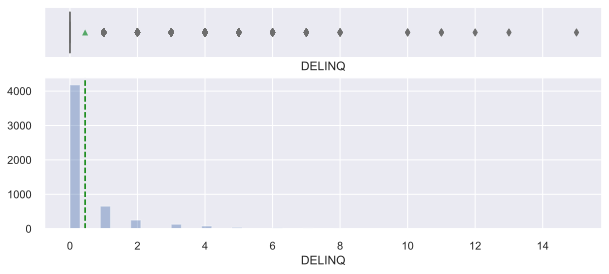

In [121]:
# Delinquent credit lines 
histogram_boxplot(data,'DELINQ')

**Insights:**

- The distribution of the  number of delinquent credit lines is discrete with the most of the customers having no such lines at all. 
- The average value is ~0.45, the median is 0. 

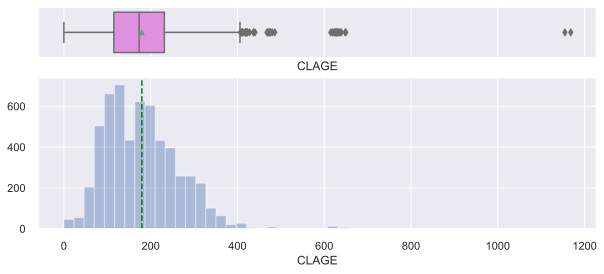

In [122]:
# Age of the oldest credit line 
histogram_boxplot(data,'CLAGE')

**Insights:**

- The distribution of the age of the oldest credit line is close to normal. 
- The average value is ~180 months, the median is ~ 173 months.
- There some values in the highest range with the longest of 1200 months (~100 years). This is clearly an outlier so we need to adress this issue. 

In [123]:
# Let's see how many values are above 480 months (40 years)
data[data['CLAGE']>480].count()[0]

22

In [124]:
# There are only 22 values which is ~ 0.4% of the data.
# Let's cap these values to 480 months which is plausible. 
data['CLAGE'][data['CLAGE']>480]=480

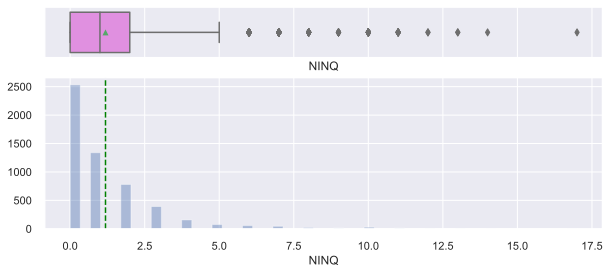

In [125]:
# Number of inquires 
histogram_boxplot(data,'NINQ')

**Insights:**

- The NINQ distribution is close to right skewed discrete. 
- The average value is ~1.2, the median is 1. 
- There are some values in the higher range, but they seem plausible, so we won't treat them as outliers. 

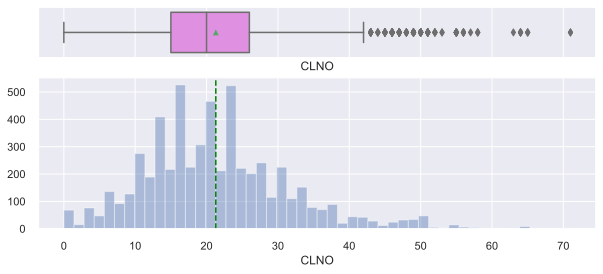

In [126]:
# The number of existing credit lines 
histogram_boxplot(data,'CLNO')

**Insights:**

- The number of existing credit lines distribution is close to normal. 

- The average value is ~21.3, the median is ~ 20.
- There are some values in the higher range, but given the high average number of credit lines, this values seem plausible and we will not treat them as outliers. 

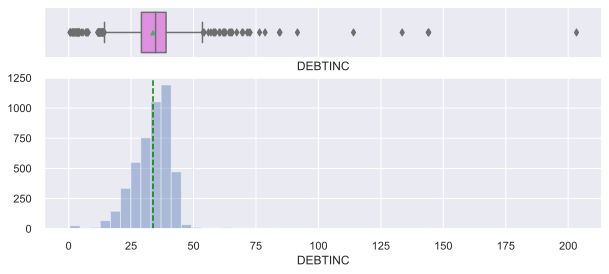

In [127]:
# Debt to Income Ratio 
histogram_boxplot(data,'DEBTINC')

**Insights:**

- The Debt to income distribution is left skewed. 
- The average value is ~34%, the median is ~ 35%.

### **2. Univariate Analysis - Categorical Data**

In [128]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(data, feature):
    '''
    data
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    plt.figure(figsize=(7,3))
    ax = sns.countplot(data=data,x=feature,palette='winter')
    
    total = len(data[feature]) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() 

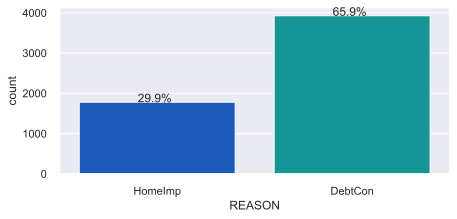

In [129]:
# Reason 
perc_on_bar(data,'REASON')

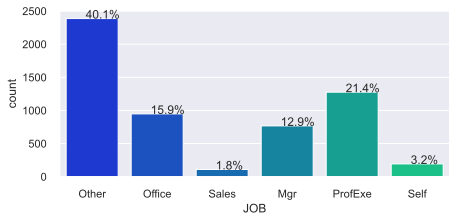

In [130]:
# Reason 
perc_on_bar(data,'JOB')

**Insights:**

- Most of the people didn't disclose their occupation, which is quite risky for the bank given the most popular reason for the credit application as debt consolidation. 
- The most popular disclosed occupations are ProfExe and Office workers. 

## **Bivariate Analysis**

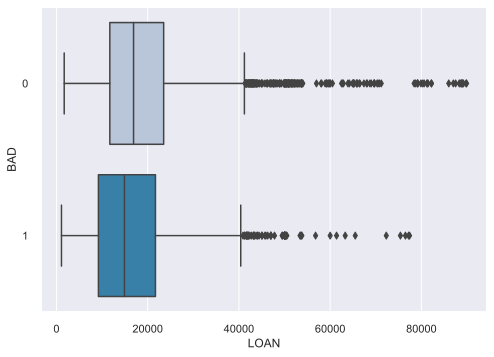

In [131]:
sns.boxplot(data=data,x='LOAN', y='BAD',orient='h',palette="PuBu");

**Insights:**

- We see that there is no distinguishable difference between loan sizes for good credits and defaulted ones. 

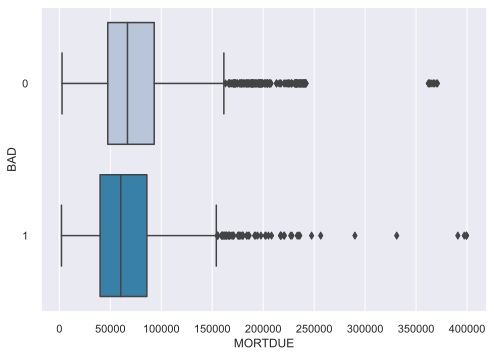

In [132]:
sns.boxplot(data=data,x='MORTDUE', y='BAD',orient='h',palette="PuBu");

**Insights:**

- Again, no distinguishable pattern

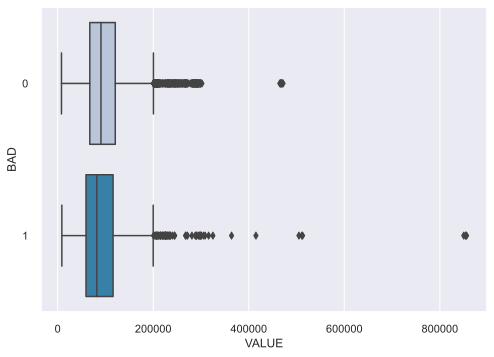

In [133]:
sns.boxplot(data=data,x='VALUE', y='BAD',orient='h',palette="PuBu");

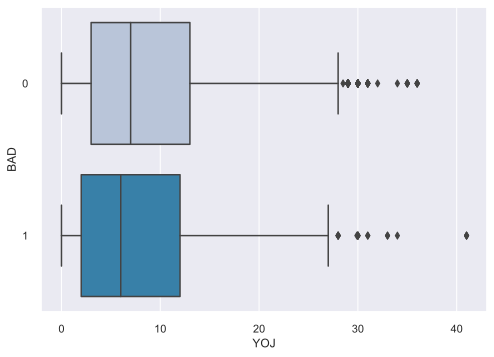

In [134]:
sns.boxplot(data=data,x='YOJ', y='BAD',orient='h',palette="PuBu");

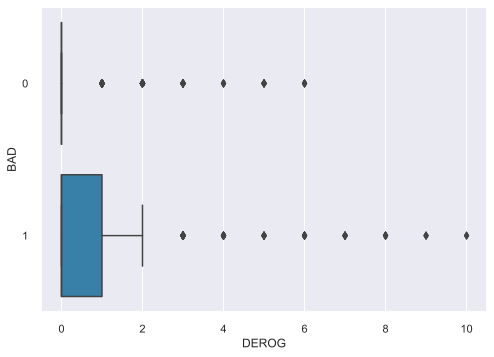

In [135]:
sns.boxplot(data=data,x='DEROG', y='BAD',orient='h',palette="PuBu");

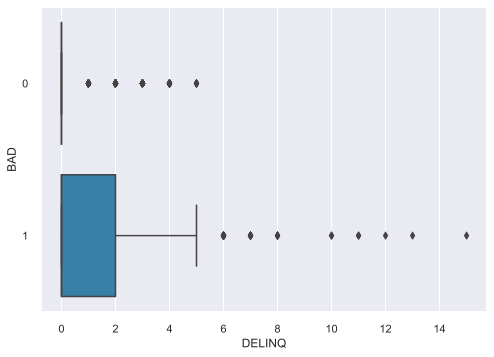

In [136]:
sns.boxplot(data=data,x='DELINQ', y='BAD',orient='h',palette="PuBu");

**Insights:**

- Again those who default tend to have more delinquent credit lines.

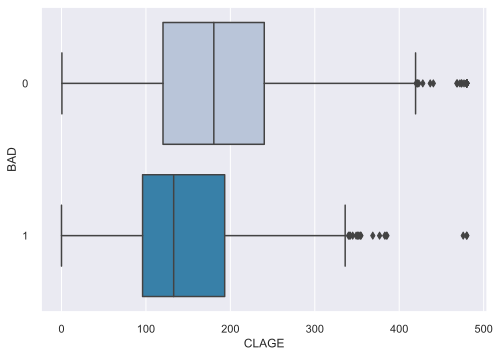

In [137]:
sns.boxplot(data=data,x='CLAGE', y='BAD',orient='h',palette="PuBu");

**Insights:**

- Those who default tend to have lower age of their credit lines.

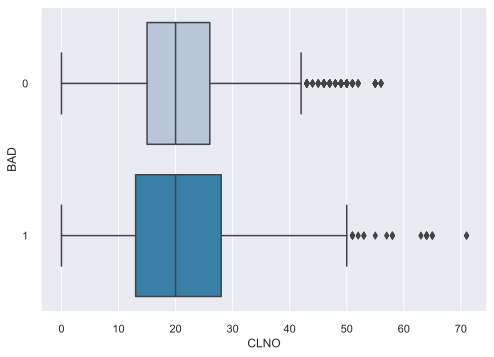

In [138]:
sns.boxplot(data=data,x='CLNO', y='BAD',orient='h',palette="PuBu");

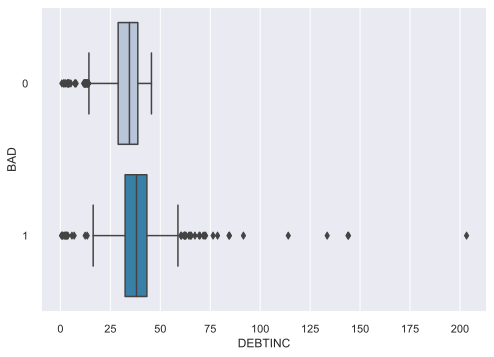

In [139]:
sns.boxplot(data=data,x='DEBTINC', y='BAD',orient='h',palette="PuBu");

**Insights:**

- We see that those who have debt to income ration higher than 55% are very likely to default. 

### **Bivariate Analysis:  BAD vs Categorical Variables**

In [140]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,3))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


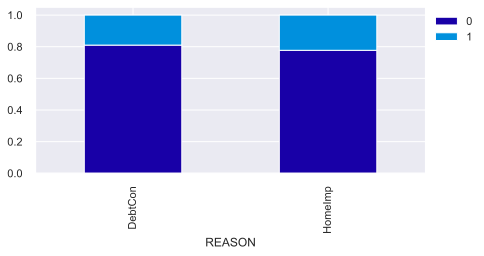

In [141]:
stacked_plot(data['REASON'])

**Insights:**
- It seems counter-intuitive, but those who take credit for home improvement tend to have higher chanses of defaulting.

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


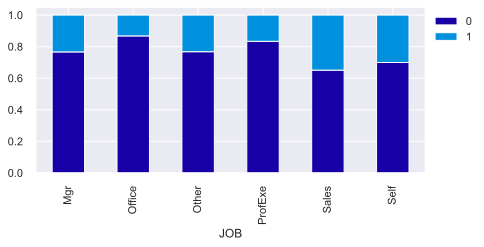

In [142]:
stacked_plot(data['JOB'])

**Insights:**
- People working in sales and self-employed have higher chances of defaulting. 

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

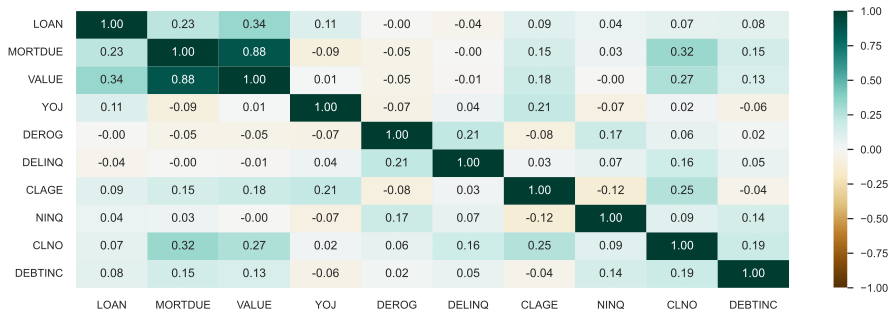

In [143]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

corr = data[numerical_col].corr()

plt.figure(figsize=(16,5))
sns.heatmap(corr,cmap='BrBG',vmax=1,vmin=-1,
        annot=True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Insights:**
- There is strong correlation between Value and Mortgage Due. Which is natural. 
- Low correlation between:
     - Value and Loan
     - Mortdue and Loan
     - CLNO and Mortdue
     - CLNO and Value
     - CLNO and CLAGE
  All of this correlation look quite logical. 
- All other correlations are negligible. 

# <b>Data Preparation

### Treating Outliers
We will use classic approach - all values that are higher or lower by 1.5 Interquartile range from Q3 and Q1 correspondingly will be treated as outliers and set to the values of corresponding whisker. 

In [20]:
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    
    # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)  
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [21]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting the list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

### Treating the missing values
As we saw there are quite many missing values, so we can't just drop the rows having them. We will use MICE approach to impute missing values, which proved to be very accurate for the most datasets (Correlation visualization under missing values: a comparison between imputation and direct parameter estimation methods 10.05.2023). To push it even further  we will use `miceforest` that  is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation. Another relevant advantage that it can treat categorical values as well as numerical. 

In [22]:
df.shape

(5960, 13)

In [23]:
# Let's first delete columns where more then 70% of information is missing
# Because this columns won't help the model to learn the pattern and will mislead it.
df=df[df.isnull().sum(axis=1)<round(12*0.7,0)]

In [24]:
df.shape

(5859, 13)

**Insights:**

- We deleted 101 rows, where >=70% of information was missing. 

In [25]:
df[['BAD','REASON','JOB']] = df[['BAD','REASON','JOB']].astype('category')

In [26]:
# Create kernel. 
kds = mf.ImputationKernel(
    df,
    save_all_iterations=True,
    datasets=3,
    random_state=100
)

# Run the MICE algorithm for 2 iterations
kds.mice(5,verbose=False)

# Return the completed dataset.
df = kds.complete_data()

### Separating the target variable from other variables

In [27]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

### Data Normalisation

Some models are not robust to the feature with different scales and most of the time feature importance will be affected by relative magnitude of the features. As we don't want that, let's normalise the data. 

In [28]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [29]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [30]:
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.238866,-0.792294,-0.941851,0.35,0.0,0.0,-0.665964,0.0,-0.916667,-0.700049,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.222672,0.153183,-0.395248,0.00,0.0,0.0,-0.428838,-0.5,-0.500000,0.397147,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.206478,-1.056727,-1.357269,-0.30,0.0,0.0,-0.190273,0.0,-0.833333,-1.434448,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.190283,0.746810,0.416051,-0.40,0.0,0.0,-0.674885,-0.5,-0.500000,-0.315115,1.0,1.0,0.0,0.0,0.0,0.0
4,-1.190283,-0.691997,-0.917754,0.20,0.0,0.0,-0.604674,0.0,-1.000000,0.155354,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,2.040486,-0.120428,0.010123,0.90,0.0,0.0,0.434273,-0.5,-0.333333,0.055714,0.0,0.0,1.0,0.0,0.0,0.0
5855,2.040486,-0.177936,0.061331,0.90,0.0,0.0,0.321034,-0.5,-0.416667,0.030599,0.0,0.0,1.0,0.0,0.0,0.0
5856,2.040486,-0.189296,0.061089,0.80,0.0,0.0,0.352007,-0.5,-0.416667,0.000408,0.0,0.0,1.0,0.0,0.0,0.0
5857,2.040486,-0.267920,0.041309,0.70,0.0,0.0,0.365932,-0.5,-0.333333,-0.120572,0.0,0.0,1.0,0.0,0.0,0.0


### Splitting the data into train, validation and test sets

In [31]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.20,stratify=y_train_val,random_state=1)

In [33]:
print('Training data: ',X_train.shape)
print('Validation data: ', X_val.shape)
print('Test data: ', X_test.shape)

Training data:  (3749, 16)
Validation data:  (938, 16)
Test data:  (1172, 16)


# <b>Modeling

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting default, but in reality the loan would not be defaulted
2. Predicting no default, but in reality the loan would be defaulted

### **Which case is more important?** 

* If we predict default, but the loan would not be defaulted we lose potential customer and profit.

* If we predict no default, but the loan would be defaulted, than we have big losses

Defaulting the loan is the greater risk, so we need to prioritize reducing false negatives.  So the Bank would want `Recall` to be maximized. The greater the `Recall` score, the higher the chances of minimizing False Negatives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [41]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible', ' Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Model Selection

We are going to explore multiple types of models in order to find the best fit for the task at hand. 
So let's create the initial list of models to check and build up from there. 

## Basic model comparison 

In [42]:
# Let's instantiate the models
lr = LogisticRegression(random_state=1)
dTree = DecisionTreeClassifier(random_state=1)
LD = LinearDiscriminantAnalysis()
QD = QuadraticDiscriminantAnalysis()
bagging = BaggingClassifier(random_state=1)
bagging_dTree = BaggingClassifier(base_estimator=dTree,random_state=1)
xTree=ExtraTreesClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
GBoost = GradientBoostingClassifier(random_state=1)
naive_bayes = GaussianNB()
ada_dTree=AdaBoostClassifier(base_estimator=dTree, random_state=1)
ada_rf = AdaBoostClassifier(base_estimator=rf)
vote=VotingClassifier(estimators=[('dTree', dTree),
                                  ('bagging',bagging),
                                  ('xTree',xTree), 
                                  ('rf',rf),
                                  ('GBoost',GBoost),
                                  ('naive_bayes',naive_bayes)],
                      voting='soft'
                      ,n_jobs=-1)

In [43]:
models=[lr,
        dTree,
        LD,
        QD,
        bagging,
        bagging_dTree,
        xTree,
        rf,
        GBoost,
        naive_bayes,
        ada_dTree,
        ada_rf,
        vote]
model_names=['lr','dTree','LD','QD','bagging','bagging_dTree','xTree',
             'rf','GBoost','naive_bayes','ada_dTree','ada_rf','vote']

In [44]:
for i, model in enumerate(models):
    model.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print(model_names[i],':',"{:.4f}".format(accuracy_score(y_train,pred_train)),'|',"{:.4f}".format(accuracy_score(y_test,pred_test)))

lr : 0.8242 | 0.8225
dTree : 1.0000 | 0.8447
LD : 0.8237 | 0.8225
QD : 0.2161 | 0.2218
bagging : 0.9896 | 0.8857
bagging_dTree : 0.9896 | 0.8857
xTree : 1.0000 | 0.9113
rf : 1.0000 | 0.8959
GBoost : 0.8861 | 0.8584
naive_bayes : 0.7909 | 0.7944
ada_dTree : 1.0000 | 0.8413
ada_rf : 1.0000 | 0.8942
vote : 1.0000 | 0.8933


**Observations**:

- All of the classifier, except for Quadratic Discriminant, provide decent results, but apprioximately 2/3 of them overfitting.  
- The best results on the test set achieved by ExtraTrees, bagging, ada_rf, random forest and GBoost. Among this models only GBoost is not overfitting, but giving worse results than the other models. 

## Looking for the optimal model on original data.

In [35]:
data_train = pd.concat([X_train,y_train],axis=1)

In [36]:
from pycaret.classification import *
s = setup(data_train, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(3749, 17)"
4,Transformed data shape,"(3749, 17)"
5,Transformed train set shape,"(2624, 17)"
6,Transformed test set shape,"(1125, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [37]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8883,0.9649,0.4561,0.9738,0.6172,0.5625,0.6198,0.0840
lightgbm,Light Gradient Boosting Machine,0.8845,0.8788,0.4926,0.8790,0.6290,0.5674,0.6020,0.0870
xgboost,Extreme Gradient Boosting,0.8826,0.8706,0.5020,0.8524,0.6308,0.5667,0.5953,0.0880
rf,Random Forest Classifier,0.8788,0.9235,0.4242,0.9395,0.5800,0.5218,0.5802,0.1170
knn,K Neighbors Classifier,0.8529,0.8059,0.3060,0.8864,0.4535,0.3913,0.4662,0.0150
gbc,Gradient Boosting Classifier,0.8525,0.8263,0.3536,0.8010,0.4870,0.4165,0.4655,0.1240
ada,Ada Boost Classifier,0.8365,0.7809,0.3307,0.6919,0.4414,0.3614,0.3973,0.0460
dt,Decision Tree Classifier,0.8300,0.7278,0.5571,0.5783,0.5664,0.4609,0.4617,0.0150
lr,Logistic Regression,0.8220,0.7404,0.1977,0.7218,0.3046,0.2391,0.3080,0.2670
lda,Linear Discriminant Analysis,0.8201,0.7374,0.1919,0.6959,0.2968,0.2305,0.2953,0.0130


**Observations**:

- We see that the Extra Trees Classifier giving the best results in terms of accuracy and F1.
- At the some time we see that the Recall is very low - only 53%. This means that approximately half of potential defaulters will not be detected. This is unacceptable. 
- Let's try to fine tune this model to achieve good level of Recall. 

### Extra Trees Model Tuning

In [48]:
# train model
et = create_model('et')

# tune model
tuned_et = tune_model(et,n_iter = 200,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8707,0.9495,0.3585,1.0000,0.5278,0.4716,0.5555
1,0.8859,0.9840,0.4340,1.0000,0.6053,0.5504,0.6162
2,0.9087,0.9543,0.5660,0.9677,0.7143,0.6644,0.6982
3,0.8745,0.9708,0.4340,0.8846,0.5823,0.5184,0.5640
4,0.8817,0.9695,0.4423,0.9200,0.5974,0.5378,0.5875
5,0.8664,0.9496,0.3269,1.0000,0.4928,0.4378,0.5294
6,0.9122,0.9719,0.5577,1.0000,0.7160,0.6690,0.7090
7,0.8855,0.9494,0.4231,1.0000,0.5946,0.5404,0.6084
8,0.8969,0.9728,0.4906,1.0000,0.6582,0.6057,0.6591


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8555,0.8449,0.5849,0.6596,0.6200,0.5312,0.5327
1,0.8935,0.9185,0.6226,0.8049,0.7021,0.6386,0.6464
2,0.8517,0.8646,0.5849,0.6458,0.6139,0.5224,0.5234
3,0.8707,0.9137,0.6415,0.6939,0.6667,0.5866,0.5873
4,0.8664,0.8754,0.5962,0.6889,0.6392,0.5577,0.5599
5,0.8511,0.8292,0.5385,0.6512,0.5895,0.4996,0.5029
6,0.8893,0.9129,0.6538,0.7556,0.7010,0.6335,0.6360
7,0.8702,0.8589,0.6538,0.6800,0.6667,0.5861,0.5863
8,0.8435,0.8917,0.6226,0.6111,0.6168,0.5185,0.5185


[I 2023-09-25 19:08:34,723] Searching the best hyperparameters using 2624 samples...
[I 2023-09-25 19:34:36,854] Finished hyperparemeter search!


**Observations**:

- Unfortunately we are still getting bad results, though recall increased to 62%. 

Let's try to tune RF model. But first let's look at the performance of validation data.

In [79]:
pred = tuned_et.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       750
           1       0.71      0.62      0.66       188

    accuracy                           0.87       938
   macro avg       0.81      0.78      0.79       938
weighted avg       0.87      0.87      0.87       938



### Random Forest Model Tuning

In [50]:
# train model
rf = create_model('rf')

# tune model
tuned_rf = tune_model(rf,n_iter = 100,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8707,0.9186,0.3774,0.9524,0.5405,0.4812,0.5514
1,0.8517,0.9341,0.3019,0.8889,0.4507,0.3882,0.4645
2,0.8783,0.9149,0.3962,1.0000,0.5676,0.5117,0.5864
3,0.8745,0.9285,0.4151,0.9167,0.5714,0.5099,0.5649
4,0.8817,0.9190,0.4231,0.9565,0.5867,0.5294,0.5896
5,0.8664,0.8827,0.3462,0.9474,0.5070,0.4485,0.5250
6,0.9122,0.9545,0.5769,0.9677,0.7229,0.6747,0.7065
7,0.8893,0.9093,0.4615,0.9600,0.6234,0.5677,0.6201
8,0.8779,0.9384,0.4151,0.9565,0.5789,0.5202,0.5825


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8441,0.8210,0.5094,0.6429,0.5684,0.4748,0.4796
1,0.8555,0.9051,0.4906,0.7027,0.5778,0.4939,0.5055
2,0.8631,0.8405,0.5094,0.7297,0.6000,0.5206,0.5328
3,0.8897,0.9057,0.6038,0.8000,0.6882,0.6228,0.6319
4,0.8435,0.8402,0.4615,0.6486,0.5393,0.4483,0.4577
5,0.8626,0.8331,0.4615,0.7500,0.5714,0.4951,0.5158
6,0.9160,0.8920,0.7500,0.8125,0.7800,0.7282,0.7291
7,0.9046,0.8764,0.5962,0.8857,0.7126,0.6580,0.6766
8,0.8969,0.8752,0.6415,0.8095,0.7158,0.6539,0.6605


[I 2023-09-25 19:46:44,555] Searching the best hyperparameters using 2624 samples...
[I 2023-09-25 20:04:48,877] Finished hyperparemeter search!


**Observations**:

- The results are close to the extra trees classifier, but the Recall is worse. 

In [78]:
pred = tuned_rf.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       750
           1       0.80      0.60      0.69       188

    accuracy                           0.89       938
   macro avg       0.85      0.78      0.81       938
weighted avg       0.88      0.89      0.88       938



### XGBoost Tuning

In [51]:
# train model
xgboost = create_model('xgboost')

# tune model
tuned_xgboost = tune_model(xgboost,n_iter = 100,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8745,0.8462,0.4340,0.8846,0.5823,0.5184,0.5640
1,0.8821,0.9079,0.5094,0.8438,0.6353,0.5701,0.5959
2,0.8593,0.8589,0.4528,0.7500,0.5647,0.4868,0.5089
3,0.8935,0.8940,0.5283,0.9032,0.6667,0.6084,0.6394
4,0.8740,0.8608,0.4808,0.8065,0.6024,0.5332,0.5584
5,0.8664,0.7890,0.4423,0.7931,0.5679,0.4963,0.5260
6,0.9160,0.9397,0.6154,0.9412,0.7442,0.6966,0.7191
7,0.8931,0.8496,0.5192,0.9000,0.6585,0.6005,0.6325
8,0.8855,0.8719,0.4906,0.8966,0.6341,0.5731,0.6097


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8631,0.8474,0.5472,0.7073,0.6170,0.5353,0.5419
1,0.8821,0.9252,0.6415,0.7391,0.6869,0.6147,0.6171
2,0.8935,0.9013,0.6415,0.7907,0.7083,0.6441,0.6493
3,0.9049,0.8863,0.6604,0.8333,0.7368,0.6798,0.6866
4,0.8740,0.8674,0.6154,0.7111,0.6598,0.5830,0.5853
5,0.8702,0.8264,0.5962,0.7045,0.6458,0.5671,0.5700
6,0.9237,0.9397,0.7115,0.8810,0.7872,0.7414,0.7476
7,0.9008,0.8767,0.6923,0.7826,0.7347,0.6739,0.6759
8,0.8931,0.8844,0.6226,0.8049,0.7021,0.6383,0.6461


[I 2023-09-25 20:05:08,556] Searching the best hyperparameters using 2624 samples...
[I 2023-09-25 20:23:52,306] Finished hyperparemeter search!


**Observations**:

- The XGBoost shows the best results so far. Let's see if we can push performance further. 

In [77]:
pred = tuned_xgboost.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       750
           1       0.80      0.64      0.71       188

    accuracy                           0.90       938
   macro avg       0.86      0.80      0.82       938
weighted avg       0.89      0.90      0.89       938



In [52]:
# Let's make one more attempt to optimise xgboost

# train model
xgboost = create_model('xgboost')

# tune model
tuned_xgboost_1 = tune_model(xgboost,n_iter = 200,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8745,0.8462,0.4340,0.8846,0.5823,0.5184,0.5640
1,0.8821,0.9079,0.5094,0.8438,0.6353,0.5701,0.5959
2,0.8593,0.8589,0.4528,0.7500,0.5647,0.4868,0.5089
3,0.8935,0.8940,0.5283,0.9032,0.6667,0.6084,0.6394
4,0.8740,0.8608,0.4808,0.8065,0.6024,0.5332,0.5584
5,0.8664,0.7890,0.4423,0.7931,0.5679,0.4963,0.5260
6,0.9160,0.9397,0.6154,0.9412,0.7442,0.6966,0.7191
7,0.8931,0.8496,0.5192,0.9000,0.6585,0.6005,0.6325
8,0.8855,0.8719,0.4906,0.8966,0.6341,0.5731,0.6097


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8783,0.8699,0.6792,0.7059,0.6923,0.6165,0.6167
1,0.9049,0.9115,0.7358,0.7800,0.7573,0.6982,0.6987
2,0.8783,0.8912,0.6604,0.7143,0.6863,0.6109,0.6117
3,0.9087,0.9076,0.7170,0.8085,0.7600,0.7039,0.7058
4,0.8435,0.8481,0.6154,0.6038,0.6095,0.5117,0.5117
5,0.8588,0.8254,0.5962,0.6596,0.6263,0.5395,0.5405
6,0.9275,0.9392,0.7692,0.8511,0.8081,0.7635,0.7650
7,0.8969,0.8788,0.7115,0.7551,0.7327,0.6689,0.6694
8,0.8817,0.8979,0.6792,0.7200,0.6990,0.6255,0.6259


[I 2023-09-25 20:24:12,308] Searching the best hyperparameters using 2624 samples...
[I 2023-09-25 20:58:41,841] Finished hyperparemeter search!


In [76]:
pred = tuned_xgboost_1.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       750
           1       0.77      0.69      0.72       188

    accuracy                           0.90       938
   macro avg       0.85      0.82      0.83       938
weighted avg       0.89      0.90      0.89       938



**Observations**:

- The results are the best so far. Let's try to push the performance further. 

In [38]:
# Let's make one more attempt to optimise xgboost

# train model
xgboost = create_model('xgboost')

# tune model
tuned_xgboost_2 = tune_model(xgboost,n_iter = 150,optimize='Kappa',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8745,0.8462,0.4340,0.8846,0.5823,0.5184,0.5640
1,0.8821,0.9079,0.5094,0.8438,0.6353,0.5701,0.5959
2,0.8593,0.8589,0.4528,0.7500,0.5647,0.4868,0.5089
3,0.8935,0.8940,0.5283,0.9032,0.6667,0.6084,0.6394
4,0.8740,0.8608,0.4808,0.8065,0.6024,0.5332,0.5584
5,0.8664,0.7890,0.4423,0.7931,0.5679,0.4963,0.5260
6,0.9160,0.9397,0.6154,0.9412,0.7442,0.6966,0.7191
7,0.8931,0.8496,0.5192,0.9000,0.6585,0.6005,0.6325
8,0.8855,0.8719,0.4906,0.8966,0.6341,0.5731,0.6097


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8631,0.8659,0.4340,0.7931,0.5610,0.4880,0.5192
1,0.8745,0.9112,0.4528,0.8571,0.5926,0.5266,0.5642
2,0.8555,0.8587,0.4340,0.7419,0.5476,0.4686,0.4925
3,0.8935,0.9147,0.5472,0.8788,0.6744,0.6149,0.6395
4,0.8626,0.8592,0.4615,0.7500,0.5714,0.4951,0.5158
5,0.8626,0.8482,0.4423,0.7667,0.5610,0.4864,0.5123
6,0.9198,0.9191,0.6538,0.9189,0.7640,0.7174,0.7325
7,0.8855,0.8627,0.5000,0.8667,0.6341,0.5720,0.6024
8,0.9008,0.8825,0.5849,0.8857,0.7045,0.6479,0.6680


[I 2023-09-26 15:00:51,356] Searching the best hyperparameters using 2624 samples...
[I 2023-09-26 15:10:01,208] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
pred = tuned_xgboost_2.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       750
           1       0.89      0.51      0.64       188

    accuracy                           0.89       938
   macro avg       0.89      0.74      0.79       938
weighted avg       0.89      0.89      0.88       938



### Balanced RF Classifier

In [56]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [57]:
clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, max_depth=3, random_state=0)
clf.fit(X_train,y_train)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=3,
                               max_features='sqrt', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=0,
                               replacement=True, sampling_strategy='all',
                               verbose=0, warm_start=False)

In [59]:
pred = clf.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       750
           1       0.47      0.66      0.55       188

    accuracy                           0.78       938
   macro avg       0.69      0.74      0.70       938
weighted avg       0.82      0.78      0.80       938



## Modeling on balanced data

Let's balance our dataset using various synthetic methods and see if any of them will provide us with a better model. 
As we a planning to create new partially synthetic DataSet for training, let's take part of the initial DataSet for validation. 

### SMOTETomek

In [51]:
from imblearn.combine import SMOTETomek

In [61]:
smtom = SMOTETomek(random_state = 1)

In [63]:
X_train_smtom,y_train_smtom = smtom.fit_resample(X_train,y_train)

In [64]:
y_train_smtom.value_counts()

0    2995
1    2995
Name: BAD, dtype: int64

In [65]:
data_train_smtom = pd.concat([X_train_smtom,y_train_smtom],axis=1)

In [66]:
s = setup(data_train_smtom, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(5990, 17)"
4,Transformed data shape,"(5990, 17)"
5,Transformed train set shape,"(4193, 17)"
6,Transformed test set shape,"(1797, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [67]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9709,0.9960,0.9623,0.9792,0.9706,0.9418,0.9422,0.6430
rf,Random Forest Classifier,0.9418,0.9868,0.9361,0.9472,0.9414,0.8836,0.8840,0.6870
xgboost,Extreme Gradient Boosting,0.9363,0.9798,0.9161,0.9550,0.9349,0.8727,0.8737,0.6470
lightgbm,Light Gradient Boosting Machine,0.9294,0.9757,0.9089,0.9479,0.9278,0.8588,0.8598,0.6690
knn,K Neighbors Classifier,0.9261,0.9778,0.9442,0.9119,0.9275,0.8521,0.8532,0.5600
dt,Decision Tree Classifier,0.8586,0.8586,0.8646,0.8548,0.8593,0.7172,0.7179,0.5810
gbc,Gradient Boosting Classifier,0.8495,0.9235,0.8307,0.8638,0.8467,0.6990,0.6999,0.6760
ada,Ada Boost Classifier,0.7780,0.8582,0.7597,0.7891,0.7738,0.5559,0.5567,0.5870
ridge,Ridge Classifier,0.6971,0.0000,0.7010,0.6965,0.6984,0.3943,0.3947,0.5570
lda,Linear Discriminant Analysis,0.6971,0.7595,0.7010,0.6965,0.6984,0.3943,0.3947,0.5600


**Observations**:

- The performance of ET increased immensely, but the model might overfit with synthetic data, so we need to validate it on validation dataset before jumping to final conclusions. But let's first try to optimise ET model further.  

In [68]:
# train model
et_smtom = create_model('et')

# tune model
tuned_et_smtom = tune_model(et_smtom,n_iter = 50,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9895,0.9429,0.9659,0.9542,0.9095,0.9098
1,0.9548,0.9951,0.9238,0.9848,0.9533,0.9095,0.9113
2,0.9810,0.9984,0.9857,0.9764,0.9810,0.9619,0.9619
3,0.9857,0.9989,0.9809,0.9903,0.9856,0.9714,0.9714
4,0.9642,0.9937,0.9474,0.9802,0.9635,0.9284,0.9289
5,0.9642,0.9964,0.9378,0.9899,0.9631,0.9284,0.9297
6,0.9666,0.9945,0.9714,0.9623,0.9668,0.9332,0.9332
7,0.9809,0.9982,0.9810,0.9810,0.9810,0.9618,0.9618
8,0.9809,0.9977,0.9762,0.9856,0.9809,0.9618,0.9619


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8833,0.9506,0.9095,0.8643,0.8863,0.7667,0.7677
1,0.8881,0.9561,0.8762,0.8976,0.8867,0.7762,0.7764
2,0.9143,0.9754,0.9143,0.9143,0.9143,0.8286,0.8286
3,0.9093,0.9763,0.9187,0.9014,0.9100,0.8186,0.8188
4,0.9021,0.9613,0.9187,0.8889,0.9035,0.8043,0.8048
5,0.8831,0.9570,0.8900,0.8774,0.8836,0.7661,0.7662
6,0.8926,0.9615,0.8905,0.8947,0.8926,0.7852,0.7852
7,0.8998,0.9651,0.9143,0.8889,0.9014,0.7995,0.7998
8,0.9117,0.9744,0.9095,0.9139,0.9117,0.8234,0.8234


[I 2023-09-25 22:07:02,568] Searching the best hyperparameters using 4193 samples...
[I 2023-09-25 22:15:11,040] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [69]:
# train model
et_smtom = create_model('et')

# tune model
tuned_et_smtom = tune_model(et_smtom,n_iter=100,optimize='Recall',search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9895,0.9429,0.9659,0.9542,0.9095,0.9098
1,0.9548,0.9951,0.9238,0.9848,0.9533,0.9095,0.9113
2,0.9810,0.9984,0.9857,0.9764,0.9810,0.9619,0.9619
3,0.9857,0.9989,0.9809,0.9903,0.9856,0.9714,0.9714
4,0.9642,0.9937,0.9474,0.9802,0.9635,0.9284,0.9289
5,0.9642,0.9964,0.9378,0.9899,0.9631,0.9284,0.9297
6,0.9666,0.9945,0.9714,0.9623,0.9668,0.9332,0.9332
7,0.9809,0.9982,0.9810,0.9810,0.9810,0.9618,0.9618
8,0.9809,0.9977,0.9762,0.9856,0.9809,0.9618,0.9619


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8952,0.9588,0.9190,0.8773,0.8977,0.7905,0.7914
1,0.8810,0.9645,0.8714,0.8883,0.8798,0.7619,0.7620
2,0.9190,0.9795,0.9333,0.9074,0.9202,0.8381,0.8384
3,0.9189,0.9810,0.9330,0.9070,0.9198,0.8377,0.8381
4,0.8998,0.9658,0.9139,0.8884,0.9009,0.7995,0.7999
5,0.8878,0.9631,0.8947,0.8821,0.8884,0.7757,0.7757
6,0.9045,0.9659,0.9143,0.8972,0.9057,0.8091,0.8092
7,0.9093,0.9701,0.9381,0.8874,0.9120,0.8186,0.8199
8,0.9212,0.9782,0.9190,0.9234,0.9212,0.8425,0.8425


[I 2023-09-25 22:15:42,949] Searching the best hyperparameters using 4193 samples...
[I 2023-09-25 22:38:38,994] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Let's see the results on validation dataset**

In [70]:
et_smtom = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9895,0.9429,0.9659,0.9542,0.9095,0.9098
1,0.9548,0.9951,0.9238,0.9848,0.9533,0.9095,0.9113
2,0.9810,0.9984,0.9857,0.9764,0.9810,0.9619,0.9619
3,0.9857,0.9989,0.9809,0.9903,0.9856,0.9714,0.9714
4,0.9642,0.9937,0.9474,0.9802,0.9635,0.9284,0.9289
5,0.9642,0.9964,0.9378,0.9899,0.9631,0.9284,0.9297
6,0.9666,0.9945,0.9714,0.9623,0.9668,0.9332,0.9332
7,0.9809,0.9982,0.9810,0.9810,0.9810,0.9618,0.9618
8,0.9809,0.9977,0.9762,0.9856,0.9809,0.9618,0.9619


In [71]:
pred = et_smtom.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       750
           1       0.87      0.70      0.78       188

    accuracy                           0.92       938
   macro avg       0.90      0.84      0.86       938
weighted avg       0.92      0.92      0.92       938



**Observations**:

- This model shows the best results so far. Let's try XGBoost to see if we can achieve even better results.

In [72]:
# train model
xgboost_stom = create_model('xgboost')

# tune model
tuned_xgboost_stom = tune_model(xgboost_stom,n_iter=100,optimize='F1',search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9190,0.9716,0.8857,0.9490,0.9163,0.8381,0.8400
1,0.9286,0.9753,0.8762,0.9787,0.9246,0.8571,0.8619
2,0.9452,0.9811,0.9333,0.9561,0.9446,0.8905,0.8907
3,0.9284,0.9765,0.9043,0.9497,0.9265,0.8568,0.8578
4,0.9332,0.9777,0.9234,0.9415,0.9324,0.8663,0.8665
5,0.9212,0.9768,0.9139,0.9272,0.9205,0.8425,0.8426
6,0.9475,0.9882,0.9238,0.9700,0.9463,0.8950,0.8960
7,0.9403,0.9768,0.9286,0.9512,0.9398,0.8807,0.8809
8,0.9570,0.9888,0.9429,0.9706,0.9565,0.9141,0.9145


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9357,0.9774,0.9524,0.9217,0.9368,0.8714,0.8719
1,0.9357,0.9804,0.9381,0.9336,0.9359,0.8714,0.8714
2,0.9548,0.9883,0.9762,0.9361,0.9557,0.9095,0.9104
3,0.9547,0.9920,0.9665,0.9439,0.9551,0.9093,0.9096
4,0.9284,0.9857,0.9665,0.8978,0.9309,0.8568,0.8593
5,0.9212,0.9835,0.9617,0.8894,0.9241,0.8425,0.8453
6,0.9451,0.9866,0.9571,0.9349,0.9459,0.8902,0.8905
7,0.9451,0.9879,0.9714,0.9231,0.9466,0.8902,0.8914
8,0.9547,0.9931,0.9810,0.9321,0.9559,0.9093,0.9106


[I 2023-09-25 22:39:29,087] Searching the best hyperparameters using 4193 samples...
[I 2023-09-25 23:04:45,386] Finished hyperparemeter search!


In [73]:
pred = tuned_xgboost_stom.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       750
           1       0.75      0.71      0.73       188

    accuracy                           0.90       938
   macro avg       0.84      0.83      0.83       938
weighted avg       0.89      0.90      0.89       938



**Observations**:

- With this model we managed to push recall a little bit further, but at expense of lower presicion. As precision dropped significantly and recall increased only marginally its better to stick to et model with stom. 

Let's try another technique to get balanced dataset.

### SMOTEENN

In [80]:
from imblearn.combine import SMOTEENN

In [81]:
smenn = SMOTEENN(random_state = 1)

In [82]:
X_train_smenn,y_train_smenn = smenn.fit_resample(X_train,y_train)

In [83]:
y_train_smenn.value_counts()

0    2844
1    2841
Name: BAD, dtype: int64

In [84]:
data_train_smenn = pd.concat([X_train_smenn,y_train_smenn],axis=1)

In [85]:
s = setup(data_train_smenn, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(5685, 17)"
4,Transformed data shape,"(5685, 17)"
5,Transformed train set shape,"(3979, 17)"
6,Transformed test set shape,"(1706, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [86]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9839,0.9984,0.9804,0.9874,0.9839,0.9678,0.9679,0.6590
rf,Random Forest Classifier,0.9618,0.9916,0.9567,0.9666,0.9615,0.9236,0.9238,0.6700
knn,K Neighbors Classifier,0.9538,0.9898,0.9653,0.9436,0.9542,0.9075,0.9079,0.5910
xgboost,Extreme Gradient Boosting,0.9470,0.9880,0.9321,0.9608,0.9461,0.8939,0.8946,0.6770
lightgbm,Light Gradient Boosting Machine,0.9442,0.9860,0.9281,0.9590,0.9432,0.8884,0.8891,0.7180
gbc,Gradient Boosting Classifier,0.8633,0.9378,0.8430,0.8785,0.8600,0.7265,0.7277,0.7060
dt,Decision Tree Classifier,0.8567,0.8567,0.8541,0.8586,0.8562,0.7135,0.7137,0.5830
ada,Ada Boost Classifier,0.7886,0.8618,0.7701,0.7998,0.7841,0.5773,0.5783,0.6260
lr,Logistic Regression,0.7014,0.7611,0.6921,0.7057,0.6984,0.4028,0.4034,0.8920
ridge,Ridge Classifier,0.7014,0.0000,0.6947,0.7046,0.6992,0.4028,0.4034,0.5820


**Observations**:

- Again we see stellar performance, but the models might overfit with synthetic data, so we need to validate it on validation dataset before jumping to final conclusions. But let's see first validation results on initial ET model and then try to optimise it.  

In [87]:
et_smenn = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9799,0.9987,0.9747,0.9847,0.9797,0.9598,0.9598
1,0.9874,0.9988,0.9899,0.9850,0.9875,0.9749,0.9749
2,0.9824,0.9996,0.9799,0.9848,0.9824,0.9648,0.9648
3,0.9824,0.9968,0.9799,0.9848,0.9824,0.9648,0.9648
4,0.9849,0.9968,0.9899,0.9801,0.9850,0.9698,0.9699
5,0.9925,0.9996,0.9849,1.0000,0.9924,0.9849,0.9850
6,0.9874,0.9999,0.9749,1.0000,0.9873,0.9749,0.9752
7,0.9724,0.9968,0.9749,0.9700,0.9724,0.9447,0.9447
8,0.9849,0.9992,0.9799,0.9898,0.9848,0.9698,0.9699


In [88]:
pred = et_smenn.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       750
           1       0.83      0.64      0.72       188

    accuracy                           0.90       938
   macro avg       0.87      0.81      0.83       938
weighted avg       0.90      0.90      0.90       938



In [89]:
# tune model
tuned_et_smenn = tune_model(et_smenn,n_iter = 50,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9271,0.9807,0.9242,0.9289,0.9266,0.8543,0.8543
1,0.9121,0.9826,0.9296,0.8981,0.9136,0.8241,0.8246
2,0.9271,0.9818,0.9146,0.9381,0.9262,0.8543,0.8545
3,0.9322,0.9763,0.9497,0.9175,0.9333,0.8643,0.8649
4,0.9422,0.9855,0.9347,0.9490,0.9418,0.8844,0.8845
5,0.9070,0.9750,0.9296,0.8894,0.9091,0.8141,0.8149
6,0.8945,0.9748,0.8844,0.9026,0.8934,0.7889,0.7891
7,0.9196,0.9735,0.9246,0.9154,0.9200,0.8392,0.8392
8,0.9146,0.9798,0.9447,0.8910,0.9171,0.8291,0.8307


[I 2023-09-25 23:35:11,788] Searching the best hyperparameters using 3979 samples...
[I 2023-09-25 23:43:10,928] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [90]:
# tune model
tuned_et_smenn = tune_model(et_smenn,n_iter=100,optimize='Recall',search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9121,0.9804,0.9242,0.9015,0.9127,0.8241,0.8244
1,0.9296,0.9849,0.9497,0.9130,0.9310,0.8593,0.8600
2,0.9246,0.9837,0.9196,0.9289,0.9242,0.8492,0.8493
3,0.9271,0.9767,0.9447,0.9126,0.9284,0.8543,0.8548
4,0.9523,0.9844,0.9497,0.9545,0.9521,0.9045,0.9045
5,0.9296,0.9835,0.9397,0.9212,0.9303,0.8593,0.8595
6,0.9070,0.9777,0.9146,0.9010,0.9077,0.8141,0.8142
7,0.9196,0.9769,0.9196,0.9196,0.9196,0.8392,0.8392
8,0.9271,0.9841,0.9548,0.9048,0.9291,0.8543,0.8556


[I 2023-09-25 23:43:28,961] Searching the best hyperparameters using 3979 samples...
[I 2023-09-26 00:02:45,315] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Observations**:

- We see that tuning the model to increase F1 or to increase Recall didn't lead to any improvement. 

In [92]:
# train model
xgboost_smenn = create_model('xgboost')

# tune model
tuned_xgboost_smenn = tune_model(xgboost_smenn,n_iter=100,optimize='F1',search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9397,0.9883,0.9192,0.9579,0.9381,0.8794,0.8801
1,0.9673,0.9929,0.9497,0.9844,0.9668,0.9347,0.9353
2,0.9472,0.9921,0.9246,0.9684,0.9460,0.8945,0.8954
3,0.9523,0.9866,0.9397,0.9639,0.9517,0.9045,0.9048
4,0.9548,0.9911,0.9397,0.9689,0.9541,0.9095,0.9100
5,0.9523,0.9905,0.9548,0.9500,0.9524,0.9045,0.9045
6,0.9397,0.9874,0.9045,0.9730,0.9375,0.8794,0.8816
7,0.9397,0.9787,0.9246,0.9534,0.9388,0.8794,0.8798
8,0.9472,0.9900,0.9548,0.9406,0.9476,0.8945,0.8946


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9447,0.9890,0.9343,0.9536,0.9439,0.8894,0.8896
1,0.9648,0.9939,0.9698,0.9602,0.9650,0.9296,0.9297
2,0.9673,0.9949,0.9648,0.9697,0.9673,0.9347,0.9347
3,0.9623,0.9886,0.9749,0.9510,0.9628,0.9246,0.9249
4,0.9623,0.9886,0.9698,0.9554,0.9626,0.9246,0.9247
5,0.9497,0.9910,0.9648,0.9366,0.9505,0.8995,0.8999
6,0.9497,0.9894,0.9347,0.9637,0.9490,0.8995,0.8999
7,0.9422,0.9767,0.9347,0.9490,0.9418,0.8844,0.8845
8,0.9623,0.9939,0.9749,0.9510,0.9628,0.9246,0.9249


[I 2023-09-26 00:03:06,206] Searching the best hyperparameters using 3979 samples...
[I 2023-09-26 00:21:10,664] Finished hyperparemeter search!


In [93]:
pred = tuned_xgboost_smenn.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       750
           1       0.74      0.63      0.68       188

    accuracy                           0.88       938
   macro avg       0.83      0.79      0.80       938
weighted avg       0.88      0.88      0.88       938



**Observations**:

- The performance on the validation dataset is low, so this model and approach is a no go.

Let's try feature engineering and transformation.

## Feature engineering

Let's create new features which might help us to improve predictive power of the data.

In [48]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [49]:
X['LOAN/VALUE'] = X['LOAN']/X['VALUE']

In [50]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [51]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [52]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.20,stratify=y_train_val,random_state=1)

In [54]:
print('Training data: ',X_train.shape)
print('Validation data: ', X_val.shape)
print('Test data: ', X_test.shape)

Training data:  (3749, 17)
Validation data:  (938, 17)
Test data:  (1172, 17)


In [55]:
data_train = pd.concat([X_train,y_train],axis=1)

In [56]:
from pycaret.classification import *
s = setup(data_train, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(3749, 18)"
4,Transformed data shape,"(3749, 18)"
5,Transformed train set shape,"(2624, 18)"
6,Transformed test set shape,"(1125, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [57]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8845,0.8722,0.4946,0.8781,0.6287,0.5673,0.6021,0.2580
et,Extra Trees Classifier,0.8842,0.9634,0.4352,0.9734,0.5971,0.5418,0.6035,0.3000
xgboost,Extreme Gradient Boosting,0.8815,0.8775,0.5058,0.8404,0.6286,0.5637,0.5910,0.3120
rf,Random Forest Classifier,0.8739,0.9189,0.4069,0.9185,0.5609,0.5006,0.5586,0.3150
gbc,Gradient Boosting Classifier,0.8548,0.8302,0.3669,0.8072,0.4999,0.4296,0.4772,0.3180
knn,K Neighbors Classifier,0.8487,0.8053,0.2927,0.8605,0.4357,0.3723,0.4453,0.2460
ada,Ada Boost Classifier,0.8369,0.7810,0.3290,0.7087,0.4398,0.3611,0.4012,0.2660
lr,Logistic Regression,0.8213,0.7382,0.1939,0.7186,0.3000,0.2347,0.3037,0.2420
lda,Linear Discriminant Analysis,0.8197,0.7355,0.1901,0.7011,0.2944,0.2283,0.2946,0.2400
dt,Decision Tree Classifier,0.8193,0.7160,0.5435,0.5493,0.5450,0.4326,0.4334,0.2370


**Observations**:

- Unfortunately we see that new feature didn't improve performance. 

Let' introduce new feature: **LOAN / (DEBTINC * LOAN).**

In [80]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [81]:
X['LOAN-to-INCOME'] = X['LOAN']/(X['DEBTINC']*X['LOAN'])

In [82]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [83]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [84]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.20,stratify=y_train_val,random_state=1)

In [86]:
print('Training data: ',X_train.shape)
print('Validation data: ', X_val.shape)
print('Test data: ', X_test.shape)

Training data:  (3749, 17)
Validation data:  (938, 17)
Test data:  (1172, 17)


In [87]:
data_train = pd.concat([X_train,y_train],axis=1)

In [88]:
from pycaret.classification import *
s = setup(data_train, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(3749, 18)"
4,Transformed data shape,"(3749, 18)"
5,Transformed train set shape,"(2624, 18)"
6,Transformed test set shape,"(1125, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [89]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8853,0.9497,0.4467,0.9599,0.6063,0.5503,0.6069,0.2900
xgboost,Extreme Gradient Boosting,0.8826,0.8706,0.5020,0.8524,0.6308,0.5667,0.5953,0.2740
lightgbm,Light Gradient Boosting Machine,0.8815,0.8820,0.4850,0.8627,0.6198,0.5564,0.5893,0.3400
rf,Random Forest Classifier,0.8750,0.9075,0.4069,0.9290,0.5617,0.5028,0.5628,0.3010
knn,K Neighbors Classifier,0.8567,0.8045,0.3118,0.9237,0.4656,0.4055,0.4861,0.2440
gbc,Gradient Boosting Classifier,0.8525,0.8265,0.3536,0.8006,0.4873,0.4167,0.4655,0.2960
ada,Ada Boost Classifier,0.8365,0.7809,0.3307,0.6919,0.4414,0.3614,0.3973,0.2520
lr,Logistic Regression,0.8289,0.7527,0.2355,0.7457,0.3520,0.2834,0.3485,0.4920
lda,Linear Discriminant Analysis,0.8281,0.7509,0.2659,0.6977,0.3779,0.3018,0.3516,0.2320
ridge,Ridge Classifier,0.8274,0.0000,0.1690,0.8342,0.2792,0.2289,0.3248,0.2320


**Observations**:

- Again - no luck. 

Let's try some other features

**Equity = VALUE - MORTDUE**

In [93]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [94]:
X['Equity'] = X['VALUE'] - X['MORTDUE']

In [96]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [97]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [98]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.20,stratify=y_train_val,random_state=1)

In [100]:
print('Training data: ',X_train.shape)
print('Validation data: ', X_val.shape)
print('Test data: ', X_test.shape)

Training data:  (3749, 17)
Validation data:  (938, 17)
Test data:  (1172, 17)


In [101]:
data_train = pd.concat([X_train,y_train],axis=1)

In [102]:
from pycaret.classification import *
s = setup(data_train, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(3749, 18)"
4,Transformed data shape,"(3749, 18)"
5,Transformed train set shape,"(2624, 18)"
6,Transformed test set shape,"(1125, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [103]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8880,0.9598,0.4581,0.9670,0.6178,0.5626,0.6182,0.3010
xgboost,Extreme Gradient Boosting,0.8788,0.8678,0.4794,0.8507,0.6103,0.5458,0.5786,0.2850
lightgbm,Light Gradient Boosting Machine,0.8784,0.8758,0.4869,0.8407,0.6155,0.5495,0.5790,0.2540
rf,Random Forest Classifier,0.8742,0.9128,0.4030,0.9314,0.5587,0.4994,0.5608,0.3070
gbc,Gradient Boosting Classifier,0.8559,0.8231,0.3612,0.8251,0.4982,0.4296,0.4813,0.3100
knn,K Neighbors Classifier,0.8514,0.8067,0.3004,0.8754,0.4442,0.3825,0.4566,0.2610
ada,Ada Boost Classifier,0.8327,0.7795,0.3232,0.6898,0.4316,0.3494,0.3877,0.2620
dt,Decision Tree Classifier,0.8228,0.7175,0.5417,0.5595,0.5497,0.4396,0.4401,0.2490
lr,Logistic Regression,0.8220,0.7403,0.1977,0.7218,0.3046,0.2391,0.3080,0.2450
lda,Linear Discriminant Analysis,0.8201,0.7374,0.1919,0.6959,0.2968,0.2305,0.2953,0.2500


**Observations**:

- Again - no luck. 

Let's try some other features

**Loan-to-Equity = LOAN / Equity**

In [104]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [105]:
X['Equity'] = X['LOAN'] / (X['VALUE'] - X['MORTDUE'])

In [106]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [107]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [108]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.20,stratify=y_train_val,random_state=1)

In [110]:
print('Training data: ',X_train.shape)
print('Validation data: ', X_val.shape)
print('Test data: ', X_test.shape)

Training data:  (3749, 17)
Validation data:  (938, 17)
Test data:  (1172, 17)


In [111]:
data_train = pd.concat([X_train,y_train],axis=1)

In [112]:
from pycaret.classification import *
s = setup(data_train, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(3749, 18)"
4,Transformed data shape,"(3749, 18)"
5,Transformed train set shape,"(2624, 18)"
6,Transformed test set shape,"(1125, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [113]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8823,0.9614,0.4239,0.9769,0.5866,0.5312,0.5961,0.2970
xgboost,Extreme Gradient Boosting,0.8815,0.8678,0.5000,0.8482,0.6266,0.5621,0.5911,0.2980
lightgbm,Light Gradient Boosting Machine,0.8788,0.8752,0.4794,0.8608,0.6124,0.5476,0.5823,0.2630
rf,Random Forest Classifier,0.8742,0.9146,0.4087,0.9204,0.5640,0.5034,0.5610,0.3160
gbc,Gradient Boosting Classifier,0.8579,0.8266,0.3783,0.8164,0.5124,0.4431,0.4898,0.3340
knn,K Neighbors Classifier,0.8514,0.8046,0.3158,0.8388,0.4561,0.3914,0.4549,0.2510
ada,Ada Boost Classifier,0.8411,0.7821,0.3479,0.7166,0.4618,0.3831,0.4203,0.2710
dt,Decision Tree Classifier,0.8255,0.7228,0.5515,0.5655,0.5574,0.4489,0.4495,0.2500
lr,Logistic Regression,0.8216,0.7413,0.2015,0.7097,0.3081,0.2411,0.3067,0.2460
lda,Linear Discriminant Analysis,0.8194,0.7382,0.1900,0.6904,0.2939,0.2273,0.2915,0.2470


**Observations**:

- Again - no luck. 

Let's try some other features

**Credit_Utilization = Total_Derog / CLNO**

In [118]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [119]:
X['Total_Derog'] = X['DEROG'] + X['DELINQ']

In [120]:
X['Credit_Utilization'] = X['Total_Derog'] / X['CLNO']

In [121]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [122]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [123]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.20,stratify=y_train_val,random_state=1)

In [125]:
print('Training data: ',X_train.shape)
print('Validation data: ', X_val.shape)
print('Test data: ', X_test.shape)

Training data:  (3749, 18)
Validation data:  (938, 18)
Test data:  (1172, 18)


In [126]:
data_train = pd.concat([X_train,y_train],axis=1)

In [127]:
from pycaret.classification import *
s = setup(data_train, target = 'BAD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(3749, 19)"
4,Transformed data shape,"(3749, 19)"
5,Transformed train set shape,"(2624, 19)"
6,Transformed test set shape,"(1125, 19)"
7,Numeric features,18
8,Rows with missing values,0.9%
9,Preprocess,True


In [128]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8895,0.9660,0.4580,0.9819,0.6186,0.5652,0.6239,0.3070
lightgbm,Light Gradient Boosting Machine,0.8845,0.8788,0.4926,0.8790,0.6290,0.5674,0.6020,0.2710
xgboost,Extreme Gradient Boosting,0.8826,0.8706,0.5020,0.8524,0.6308,0.5667,0.5953,0.2980
rf,Random Forest Classifier,0.8800,0.9268,0.4279,0.9410,0.5854,0.5273,0.5846,0.2990
knn,K Neighbors Classifier,0.8529,0.8059,0.3060,0.8864,0.4535,0.3913,0.4662,0.2530
gbc,Gradient Boosting Classifier,0.8521,0.8265,0.3536,0.7983,0.4865,0.4157,0.4642,0.3050
ada,Ada Boost Classifier,0.8365,0.7809,0.3307,0.6919,0.4414,0.3614,0.3973,0.2700
dt,Decision Tree Classifier,0.8239,0.7196,0.5455,0.5624,0.5531,0.4437,0.4442,0.2610
lr,Logistic Regression,0.8220,0.7404,0.1977,0.7218,0.3046,0.2391,0.3080,0.2500
lda,Linear Discriminant Analysis,0.8201,0.7374,0.1919,0.6959,0.2968,0.2305,0.2953,0.2620


**Observations**:

- Again - no luck. 

So let's stick to the best model so far: Extra Trees with STOM and try to fine tune it to increase the performance to its maximum.

## Final Model

In [128]:
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)
X = df.drop('BAD',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['BAD']

In [129]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)

X_scaled = transformer.transform(X)

In [130]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [131]:
from imblearn.combine import SMOTETomek

In [132]:
smtom = SMOTETomek(random_state = 1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20,stratify=y_train,random_state=1)

In [134]:
X_train_smtom,y_train_smtom = smtom.fit_resample(X_train,y_train)

In [135]:
y_train_smtom.value_counts()

0    2995
1    2995
Name: BAD, dtype: int64

In [136]:
data_train_smtom = pd.concat([X_train_smtom,y_train_smtom],axis=1)
data_val = pd.concat([X_val,y_val],axis=1)

In [137]:
s = setup(data_train_smtom, target ='BAD', index=False, test_data=data_val, session_id = 123)

,Description,Value
0,Session id,123
1,Target,BAD
2,Target type,Binary
3,Original data shape,"(6928, 17)"
4,Transformed data shape,"(6928, 17)"
5,Transformed train set shape,"(5990, 17)"
6,Transformed test set shape,"(938, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [138]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9853,0.9991,0.9803,0.9902,0.9850,0.9706,0.9711,0.2300
knn,K Neighbors Classifier,0.9629,0.9929,0.9669,0.9596,0.9630,0.9259,0.9264,0.1560
rf,Random Forest Classifier,0.9616,0.9935,0.9552,0.9677,0.9609,0.9232,0.9242,0.2930
xgboost,Extreme Gradient Boosting,0.9484,0.9861,0.9254,0.9697,0.9438,0.8968,0.9019,0.2490
lightgbm,Light Gradient Boosting Machine,0.9354,0.9827,0.9074,0.9614,0.9298,0.8708,0.8767,0.2800
dt,Decision Tree Classifier,0.8845,0.8844,0.8814,0.8874,0.8836,0.7689,0.7702,0.1480
gbc,Gradient Boosting Classifier,0.8523,0.9273,0.8249,0.8712,0.8445,0.7045,0.7085,0.3240
ada,Ada Boost Classifier,0.7818,0.8548,0.7612,0.7936,0.7753,0.5636,0.5657,0.1950
lr,Logistic Regression,0.6930,0.7526,0.6868,0.6956,0.6909,0.3860,0.3862,0.8710
nb,Naive Bayes,0.6912,0.7335,0.6701,0.6999,0.6845,0.3823,0.3829,0.1480


In [139]:
et_smtom = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9970,0.9231,0.9928,0.9567,0.9165,0.9188
1,0.9549,0.9966,0.9231,0.9857,0.9534,0.9098,0.9117
2,0.9816,0.9992,0.9799,0.9832,0.9816,0.9633,0.9633
3,0.9950,0.9999,0.9967,0.9933,0.9950,0.9900,0.9900
4,0.9950,0.9998,0.9933,0.9966,0.9950,0.9900,0.9900
5,0.9900,0.9995,0.9900,0.9900,0.9900,0.9800,0.9800
6,0.9967,0.9999,1.0000,0.9934,0.9967,0.9933,0.9933
7,0.9967,0.9996,0.9967,0.9967,0.9967,0.9933,0.9933
8,0.9983,1.0000,1.0000,0.9967,0.9983,0.9967,0.9967


In [140]:
# Let's try to tune it:
tuned_et_smtom = tune_model(et_smtom,n_iter = 50,optimize='F1',search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8581,0.9491,0.8094,0.8963,0.8506,0.7161,0.7195
1,0.8564,0.9420,0.8361,0.8711,0.8532,0.7128,0.7134
2,0.9132,0.9742,0.9064,0.9186,0.9125,0.8264,0.8264
3,0.9165,0.9755,0.9298,0.9055,0.9175,0.8331,0.8334
4,0.9416,0.9860,0.9498,0.9342,0.9420,0.8831,0.8833
5,0.9182,0.9816,0.9200,0.9169,0.9185,0.8364,0.8364
6,0.8898,0.9735,0.9300,0.8611,0.8942,0.7796,0.7821
7,0.9015,0.9737,0.9200,0.8875,0.9034,0.8030,0.8035
8,0.9466,0.9885,0.9500,0.9437,0.9468,0.8932,0.8932


[I 2023-09-29 16:30:20,978] Searching the best hyperparameters using 5990 samples...
[I 2023-09-29 16:35:23,425] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Observations**:

- The initial model is better, so we stick to it. 

In [141]:
pred = et_smtom.predict(X_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       750
           1       0.92      0.70      0.79       188

    accuracy                           0.93       938
   macro avg       0.92      0.84      0.87       938
weighted avg       0.93      0.93      0.92       938



**Observations**:

- The performance on the test data set is rather good, given small size of initial dataset and even smaller amount of entries with class 1 (default). But we see that we get rather good precision of 92% on class 1 and substantially lower recall of 70%, when recall is much more important for us. 

Let's try to finetune treshold to achieve good balance between recall and precision on class 1 (default).
But first let's save the final model. 

In [143]:
probabilities = et_smtom.predict_proba(X_val)[:, 1]
new_threshold = 0.35  # We will adjust this value
new_predictions = [1 if prob > new_threshold else 0 for prob in probabilities]

In [145]:
print(classification_report(y_val,new_predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       750
           1       0.82      0.86      0.84       188

    accuracy                           0.93       938
   macro avg       0.89      0.91      0.90       938
weighted avg       0.94      0.93      0.94       938



**Observations**:

- With threshold balancing we get very good results. Let's check different tresholds to find optimal point. 

In [207]:
thresholds = [0.25, 0.30, 0.35, 0.40, 0.45]

df_metrics = pd.DataFrame(columns = ['Threshold','Presicion','Recall'])
probabilities = et_smtom.predict_proba(X_val)[:, 1]

for index, threshold in enumerate(thresholds):
    
    predictions = [1 if prob > threshold else 0 for prob in probabilities]
    precision = classification_report(y_val,predictions, output_dict=True)['1']['precision']
    recall = classification_report(y_val,predictions, output_dict=True)['1']['recall']
    
    df_metrics.loc[index] = [threshold,precision,recall]  

In [208]:
df_metrics

,Threshold,Presicion,Recall
0,0.25,0.721519,0.909574
1,0.30,0.778302,0.877660
2,0.35,0.822335,0.861702
3,0.40,0.843243,0.829787
4,0.45,0.874251,0.776596


**Observations**:

- Threshold value of 0.35, seems to be the optimal as its far from extreme values, which increase risk of overfitting and provides the steepest growth in Recall while slowest decrease in Precision.

Let's check how it will work on the test data.  

In [171]:
probabilities = et_smtom.predict_proba(X_test)[:, 1]
new_threshold = 0.35  # We will adjust this value
new_predictions = [1 if prob > new_threshold else 0 for prob in probabilities]

In [172]:
print(classification_report(y_test,new_predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       937
           1       0.81      0.86      0.84       235

    accuracy                           0.93      1172
   macro avg       0.89      0.91      0.90      1172
weighted avg       0.93      0.93      0.93      1172



**Observations**:

- There is no signs of overfitting. So this approach proves to be successful. 

In [177]:
# Let's  create the final model
et_smtom = create_model('et', probability_threshold=0.35)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9970,0.9732,0.9572,0.9652,0.9299,0.9300
1,0.9699,0.9966,0.9799,0.9607,0.9702,0.9399,0.9401
2,0.9783,0.9992,1.0000,0.9583,0.9787,0.9566,0.9575
3,0.9800,0.9999,1.0000,0.9614,0.9803,0.9599,0.9607
4,0.9783,0.9998,1.0000,0.9583,0.9787,0.9566,0.9575
5,0.9750,0.9995,0.9967,0.9553,0.9755,0.9499,0.9508
6,0.9783,0.9999,1.0000,0.9585,0.9788,0.9566,0.9575
7,0.9750,0.9996,1.0000,0.9524,0.9756,0.9499,0.9511
8,0.9900,1.0000,1.0000,0.9804,0.9901,0.9800,0.9802


In [180]:
# Let's save the model 

save_model(et_smtom, 'Final_Model_ET_STOM')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/tl/cgpptbys0nd5v9_lpzlxydhr0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LOAN', 'MORTDUE', 'VALUE', 'YOJ',
                                              'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
                                              'CLNO', 'DEBTINC',
                                              'REASON_HomeImp', 'JOB_Office',
                                              'JOB_Other', 'JOB_ProfExe',
                                              'JOB_Sales', 'JOB_Self'],
                                     transformer=SimpleImputer(ad...
                                                                                       random_state=123,
                                                                                       verbose=0,
                                                                                       warm

# <b>Final Model Analysis

In [181]:
evaluate_model(et_smtom)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [184]:
evaluate_model(et_smtom)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

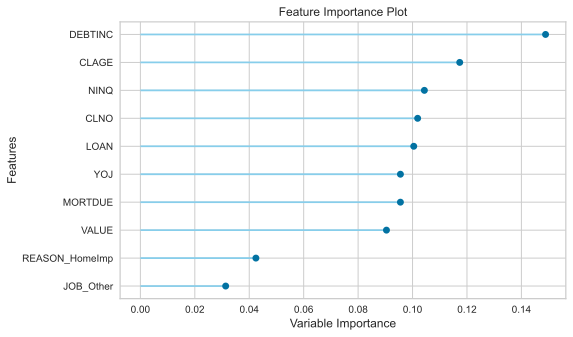

In [186]:
plot_model(et_smtom, plot = 'feature')

**Observations**:

- We see that the final model achieves impressive results in predicting default by applicants with >95% accuracy on class 0 (no default) and 86.2% Recall/81.8% Precision on class 1 (default). 

- The above performance is  achieved despite small size of initial dataset - 5960 entries. 

- The most important features which influence the result of approval a new loan to a customer:

  - **DEBTINC** (Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income).
  - **CLAGE:** Age of the oldest credit line in months.
  - **NINQ:** Number of recent credit inquiries. 
  - **CLNO:** Number of existing credit lines.
  - **LOAN:** Amount of loan approved.
  - **YOJ:** Years at present job.
  - **MORTDUE:** Amount due on the existing mortgage.
  - **VALUE:** Current value of the property. 
  
  
- The most important features are DEBTINC and CLAGE and the rest of the listed above features having almost equal importance compared to each other, but still less important than these two. 
   

## **Potential Business Impact**

**Limitations**:

Unfortunately we don't know: 

    - The period for which the dataset was collected. 
    - Timing when the loans in the dataset were approved.
    - The amount of the loan which was defaulted after all the payments done
    - The margin which would be lost if the credit wasn't approved, but wouldn't actually default, so the Bank lost credible client.    
    
With these limitations in mind we will try to estimate potential business impact assuming that:

**Assumptions**:

    - Business impact is calculated for the comparable period to the period corresponding to validation plus test datasets. Which is aproximately 36% of the period for which the data was collected in the provided dataset.  
    - Any defaulted loan was defaulted completely, so no payments were actually done by a client for this loan.
    - The average expected Return on the Loan (Net Profit/Amount of Loan provided) is 10%.


In [229]:
X_val_test = pd.concat([X_val,X_test],axis=0)

In [231]:
y_val_test = pd.concat([y_val,y_test],axis=0)

In [236]:
df_val_test = df.loc[X_val_test.index]

In [241]:
df_val_test

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4532,0,24300,93520.0,137241.000,DebtCon,ProfExe,17.0,0.0,0.0,199.763563,0.0,20.0,27.471560
2065,0,13300,15346.0,27136.000,HomeImp,Office,27.0,0.0,0.0,210.996975,1.0,4.0,23.807148
342,0,6300,59781.0,72890.000,HomeImp,Office,1.0,0.0,0.0,41.250114,0.0,3.0,39.198068
1504,0,11300,74783.0,100909.000,HomeImp,ProfExe,5.0,0.0,0.0,85.664834,0.0,34.0,35.947855
4552,0,24400,10952.0,28900.000,HomeImp,Other,24.0,0.0,0.0,81.166667,2.0,15.0,30.790621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4448,0,23700,93734.0,98099.000,HomeImp,Other,8.0,0.0,0.0,127.122147,1.0,15.0,30.020088
5556,0,40000,134029.0,191990.000,DebtCon,Mgr,24.0,0.0,0.0,178.780960,0.0,24.0,34.521450
545,1,7500,42000.0,55320.000,HomeImp,Other,21.0,0.0,0.0,158.900000,1.0,21.0,40.594852
2283,0,14200,34558.0,40754.000,HomeImp,Other,8.0,0.0,0.0,76.431213,2.0,11.0,31.041184


In [242]:
# Total amount of loans which were defaulted:
Loans_initally_defaulted = df_val_test[df_val_test["BAD"]==1]['LOAN'].sum()
print(Loans_initally_defaulted,'USD')

7058900 USD


In [243]:
# Loans defaulted/Loans provided ratio
default_ratio_in_USD = Loans_initally_defaulted/ df_val_test['LOAN'].sum()
default_ratio_in_USD

0.18267712867546207

In [244]:
# After deploying the model on the same data
pred = et_smtom.predict(X_val_test)
print(classification_report(y_val_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1687
           1       0.81      0.87      0.84       423

    accuracy                           0.93      2110
   macro avg       0.89      0.91      0.90      2110
weighted avg       0.94      0.93      0.93      2110



In [245]:
df_val_test['PRED_BAD'] = pred

In [251]:
true_predicted_defaults = df_val_test[(df_val_test['BAD']==1) & (df_val_test['PRED_BAD']==1)]['LOAN'].sum()
print(true_predicted_defaults,'USD')

6154700 USD


In [252]:
lost_clients_loan_amount = df_val_test[(df_val_test['BAD']==0) & (df_val_test['PRED_BAD']==1)]['LOAN'].sum()
print(lost_clients_loan_amount,'USD')

1214100 USD


**Summary**:

- Based on asumptions and calculations made above  deploying proposed model will help to save up to 87%, which is in case of combined validation and test data sets equals to 6.2 mln USD saved out of 7.1 mln USD which were lost without model deployment.
- There will be some amount lost on credible clients which were incorrectly indentified as defaulting client. The amount of Return on Loan lost is 1.2 * 0.1 = 0.12 mln USD, which is very small amount compared to 6.2 mln USD saved.
- Total amount of money saved is 6.1 mnl out of 7.1 mln USD, or ~ 86%. 

# <b>Final Recommendations

- We developed and trained Extra Trees Classifier model with SMOTETomek class balancing technique and custom decision threshold.

- We recommend to use it to define credibility of the new applicants.

- Model should be constantly assessed on new data flow to catch drift in its performance and retrain

- In order to improve performance further we reccomend to collect bigger dataset of at least 15,000 entries, and preferably 100,000 entries. With this data we can use more advanced techniques to build a successful model. 
- To interpret the model the most important features are:
  - **DEBTINC** (Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income).
  - **CLAGE:** Age of the oldest credit line in months.
  - **NINQ:** Number of recent credit inquiries. 
  - **CLNO:** Number of existing credit lines.
  - **LOAN:** Amount of loan approved.
  - **YOJ:** Years at present job.
  - **MORTDUE:** Amount due on the existing mortgage.
  - **VALUE:** Current value of the property. 
  
  
With the first two being the most important features and the rest being almost equally important compared to each other, but still less important than these two. 
   
 